# Churn de clientes

## Problema

Temos um conjunto de dados de clientes pessoa física (PF) de um banco específico. A nossa variável **dependente** é "Exited", que é binária: 1 se o cliente saiu e 0 caso contrário. As variáveis **independentes** incluem gênero, idade, localização, pontuação de crédito, salário estimado, entre outras.

O objetivo é identificar os clientes mais propensos a encerrar sua relação com o banco a partir das variáveis independentes. Para isso, vamos construir um modelo de regressão logística.

Primeiro, vamos importar as bibliotecas básicas.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


import warnings
warnings.filterwarnings('ignore')

## Carregar os dados
Observe shape, columns, head e type dos dados

In [6]:
file_path = 'dataset/Customer-Churn-Records.csv'
df = pd.read_csv(file_path)
df.shape

(10000, 18)

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [8]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

## Sobre os Dados
O conjunto possui 10.000 linhas e 18 colunas. As colunas são:

| **Nome do Campo**       | **Tipo de Dado**  | **Descrição do Campo**                                                                                              |
|------------------------|-------------------|---------------------------------------------------------------------------------------------------------------------|
| RowNumber              | int64             | Corresponde ao número do registro (linha) e não tem efeito no resultado.                                            |
| CustomerId             | int64             | Contém valores aleatórios e não afeta se o cliente deixa o banco.                                                   |
| Surname                | object            | O sobrenome de um cliente não impacta sua decisão de deixar o banco.                                                |
| CreditScore            | int64             | Pode afetar o churn do cliente, já que clientes com pontuações de crédito mais altas são menos propensos a sair.    |
| Geography              | object            | A localização de um cliente pode afetar sua decisão de deixar o banco.                                              |
| Gender                 | object            | É interessante explorar se o gênero desempenha um papel na saída de um cliente do banco.                            |
| Age                    | int64             | A idade é relevante, pois clientes mais velhos são menos propensos a deixar o banco do que os mais jovens.          |
| Tenure                 | int64             | Refere-se ao número de anos que o cliente está com o banco. Tipicamente, clientes mais antigos são mais leais.      |
| Balance                | float64           | Um bom indicador de churn, já que clientes com saldo maior são menos propensos a sair do banco.                     |
| NumOfProducts          | int64             | Refere-se ao número de produtos que um cliente adquiriu através do banco.                                           |
| HasCrCard              | int64             | Indica se o cliente possui ou não um cartão de crédito. Clientes com cartões de crédito são menos propensos a sair. |
| IsActiveMember         | int64             | Clientes ativos são menos propensos a deixar o banco.                                                               |
| EstimatedSalary        | float64           | Assim como o saldo, clientes com salários mais baixos são mais propensos a sair do banco do que aqueles com salários mais altos. |
| Exited                 | int64             | Indica se o cliente deixou ou não o banco.                                                                          |
| Complain               | int64             | Indica se o cliente registrou uma reclamação ou não.                                                                |
| Satisfaction Score     | int64             | Pontuação fornecida pelo cliente para a resolução de sua reclamação.                                                |
| Card Type              | object            | Tipo de cartão possuído pelo cliente.                                                                               |
| Points Earned          | int64             | Pontos ganhos pelo cliente ao usar seu cartão de crédito.                                                           |

Nessa etapa já podemos tirar algumas conclusões sobre os nossos dados:
1. As colunas RowNumber, CustomerId, Surname não agregam aos dados de analise, então não usaremos elas em nosso modelo
1. As colunas Balance e EstimatedSalary devem trazer valores continuos
1. Os dados de tipo object são classificações

## Análise Exploratória de Dados (EDA)
Agora que identificamos os aspectos-chave dos nossos dados, podemos prosseguir para extrair algumas estatísticas relevantes.


In [9]:
df.info() #substitui df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### Observações Iniciais

1. Não há valores nulos ou ausentes no conjunto de dados.
2. Os tipos de dados parecem consistentes com as expectativas.
3. As colunas "Balance" e "EstimatedSalary" têm muita variação - requerem escalonamento de características.

## Matriz de Correlação

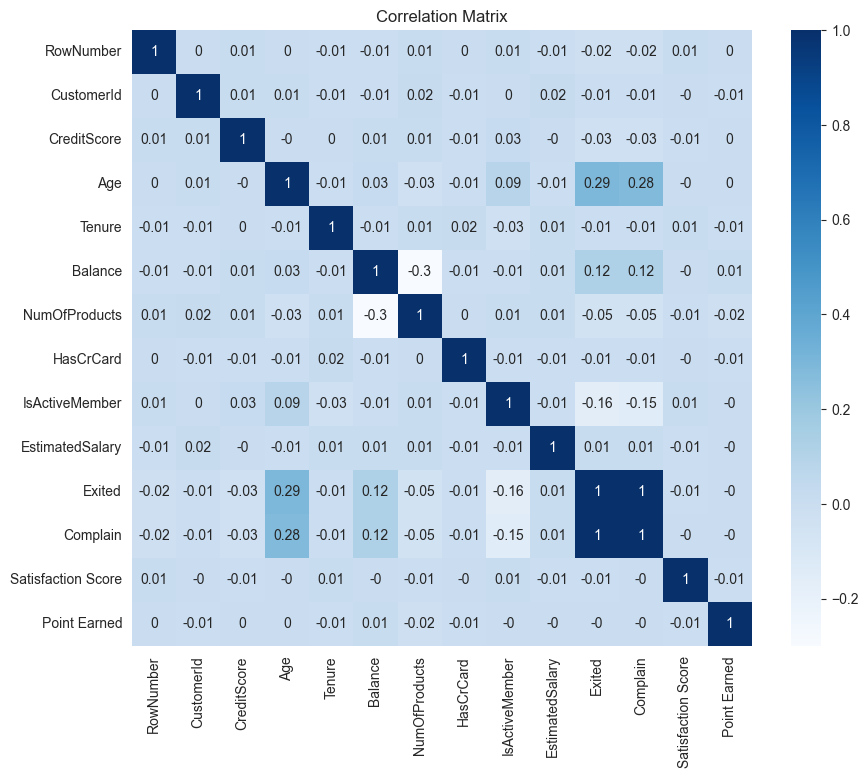

In [11]:
corr = df.corr(numeric_only = True).round(2)

plt.figure(figsize= (10, 8))
plt.title('Correlation Matrix')
sns.heatmap(data = corr, annot= True, cmap = 'Blues', cbar= True)
plt.show()

In [12]:
corr['Exited'].sort_values(ascending = False)

Exited                1.00
Complain              1.00
Age                   0.29
Balance               0.12
EstimatedSalary       0.01
Point Earned         -0.00
CustomerId           -0.01
Tenure               -0.01
HasCrCard            -0.01
Satisfaction Score   -0.01
RowNumber            -0.02
CreditScore          -0.03
NumOfProducts        -0.05
IsActiveMember       -0.16
Name: Exited, dtype: float64

<Axes: >

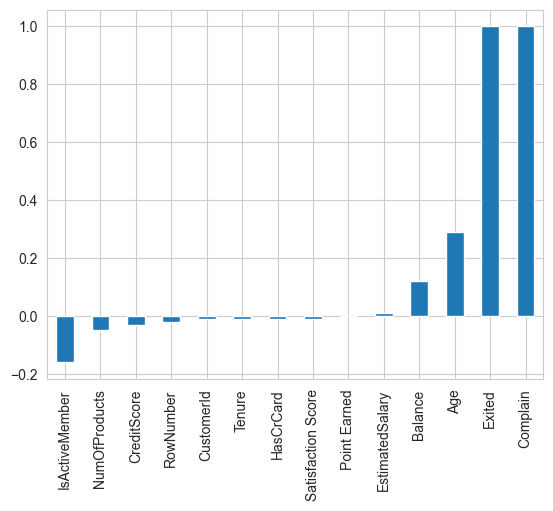

In [13]:
corr['Exited'].sort_values().plot(kind='bar')

## **Observações**

1. **Reclamações e "Exited"**: A correlação de 1 entre "Complain" (reclamação) e "Exited" é um sinal forte de que clientes que apresentaram reclamações têm maior probabilidade de sair do banco. **CUIDADO**, é muito pouco usual uma corelação tão forte, se estivessemos falando de um problema real teriamos que rever os filtros usados pasa gerar essa base e verificar se não tem um problema com a origem da tabela. Inclusive, como existe uma correlação de 100% entre si, nós vamos remover "Complain" do modelo.

1. **Idade e "Exited"**: Há uma correlação positiva moderada (0.29) entre a idade e a saída do banco, indicando que clientes mais velhos são mais propensos a deixar o banco. Isso pode ser um ponto importante para estratégias de retenção, focando em clientes de diferentes faixas etárias.

1. **Saldo e "Exited"**: A correlação entre "Balance" e "Exited" é próxima de 0 (0.12), mas ainda sugere que clientes com saldos maiores têm uma leve tendência a deixar o banco. Isso é interessante, pois indica que mesmo clientes com saldo considerável podem estar em risco de churn. Outro insight seja que temos um numero grande de contas com saldo muito baixo de clientes que são inativos, caso nosso banco não cobre taxas de manutenção de conta podemos estar encergando um segundo problema aqui.

1. **Pontuação de Crédito e "Exited"**: Há uma correlação moderadamente negativa (-0.03), embora baixa, entre a pontuação de crédito e a saída do banco. Isso sugere que clientes com pontuação de crédito mais alta são um pouco menos propensos a deixar o banco, mas o efeito é pequeno.

1. **Atividade e "Exited"**: A correlação negativa (-0.16) entre "IsActiveMember" e "Exited" indica que clientes ativos são menos propensos a sair, confirmando a importância de manter os clientes engajados com os serviços do banco.

1. **Satisfação e "Exited"**: Não há uma correlação significativa entre o "Satisfaction Score" (pontuação de satisfação) e a saída do banco, o que pode ser inesperado, indicando que a satisfação medida pelos métodos atuais pode não estar capturando a real intenção de churn dos clientes.

1. **"Exited" e "Complain"** têm uma correlação de 100% ou correlação perfeita entre si. Vamos remover "Complain" do modelo.

## **Churn como Variável Alvo**

Agora vamos observar a distribuição geral da variável alvo "Exited".


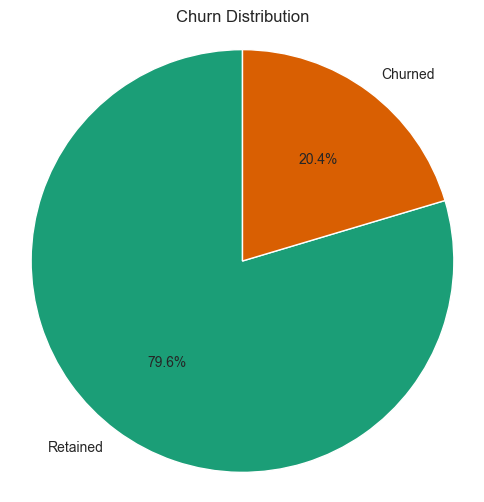

In [14]:
labels = ['Retained', 'Churned']
plt.figure(figsize = (6,6))
plt.pie(x = df['Exited'].value_counts(), labels= labels, colors=plt.cm.Dark2.colors,
        autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.axis('equal')
plt.show() 

**Observações**

- 20% dos clientes estão saindo do banco. Este é um número significativo para qualquer organização.


### Churn por Gênero
Qual gênero é mais propenso a churn (saída)?

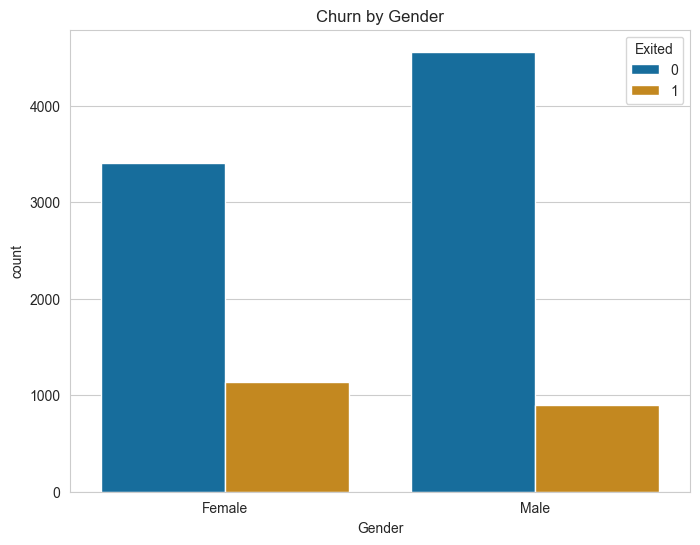

In [15]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x= 'Gender', hue = 'Exited', palette = 'colorblind')
plt.title('Churn by Gender')
plt.show()

In [16]:
churn_rate_gender = df.groupby('Gender')['Exited'].mean()*100
print(churn_rate_gender)

Gender
Female    25.071539
Male      16.474253
Name: Exited, dtype: float64


25% dos clientes que estão saindo são mulheres. A porcentagem correspondente para os homens é de 16,47%.

### **Churn por Geografia**
Qual país está enfrentando uma maior taxa de churn?

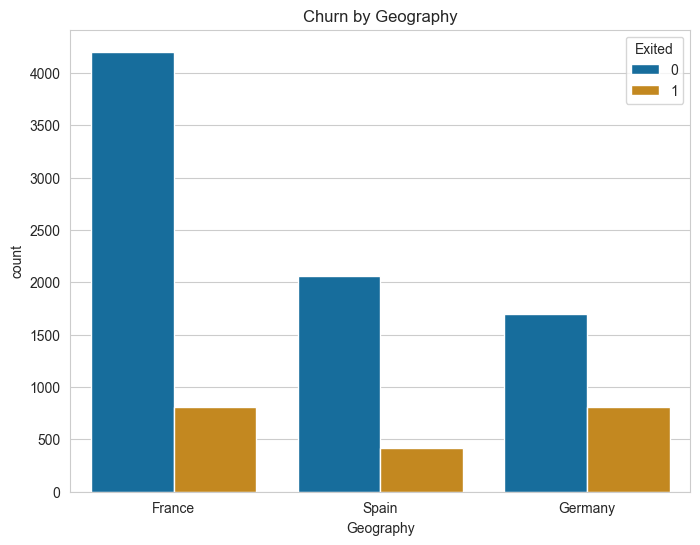

In [27]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x= 'Geography', hue = 'Exited', palette = 'colorblind')
plt.title('Churn by Geography')
plt.show() 

In [28]:
churn_rate_geography = df.groupby('Geography')['Exited'].mean()*100
print(churn_rate_geography)

Geography
France     16.174711
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64


A Alemanha tem a maior taxa de churn, com 32,44%, seguida pela Espanha e França, ambas com 16%.


### Churn por Faixa Etária
Crie uma nova coluna chamada "FaixaEtaria" que coloque diferentes idades em grupos de faixa etária.


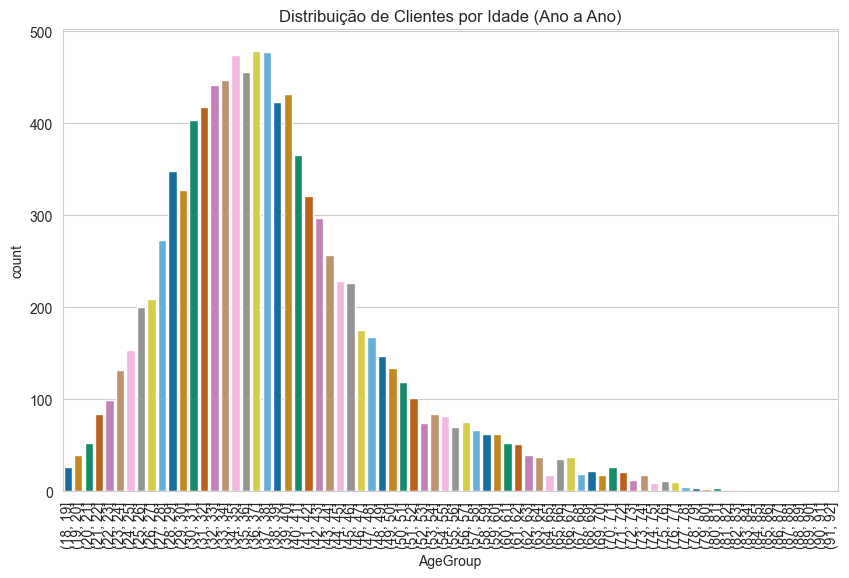

In [19]:

bins = np.arange(df['Age'].min(), df['Age'].max() + 1, 1)


df['AgeGroup'] = pd.cut(df['Age'], bins=bins)


plt.figure(figsize=(10,6))
plt.title('Distribuição de Clientes por Idade (Ano a Ano)')
sns.countplot(data=df, x='AgeGroup', palette='colorblind')
plt.xticks(rotation=90)  
plt.show()

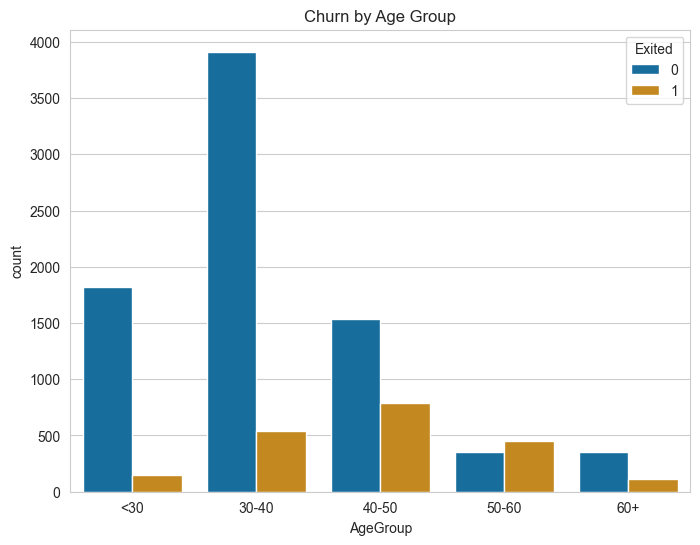

In [17]:
df['AgeGroup'] = pd.cut(df['Age'], bins = [0, 30, 40, 50, 60, np.inf],
                        labels = ['<30', '30-40', '40-50', '50-60', '60+'])
plt.figure(figsize = (8,6))
plt.title('Churn by Age Group')
sns.countplot(data = df, x = 'AgeGroup', hue = 'Exited', palette= 'colorblind')
plt.show() 

In [18]:
churn_rate_age = df.groupby('AgeGroup')['Exited'].mean()*100
print(churn_rate_age)

AgeGroup
<30       7.520325
30-40    12.109638
40-50    33.965517
50-60    56.210790
60+      24.784483
Name: Exited, dtype: float64



50-60 tem a maior taxa de churn com 56,21%, seguido por 40-50 com 34% e a categoria 60+ com 25%. Os clientes mais jovens são mais propensos a permanecer.

### Churn por Número de Produtos
Observamos uma correlação negativa entre eles, então, muito provavelmente, à medida que o número de produtos aumenta, a taxa de churn deve diminuir.

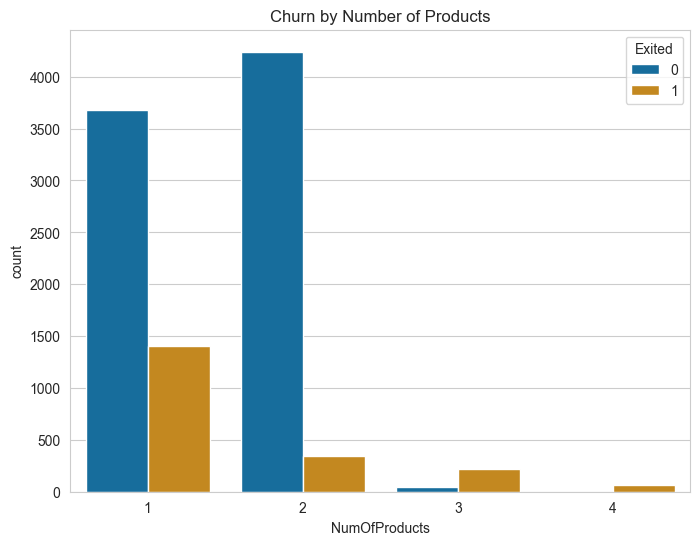

In [20]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x= 'NumOfProducts', hue = 'Exited', palette = 'colorblind')
plt.title('Churn by Number of Products')
plt.show() 

In [21]:
churn_rate_products = df.groupby('NumOfProducts')['Exited'].mean()*100
print(churn_rate_products)

NumOfProducts
1     27.714398
2      7.603486
3     82.706767
4    100.000000
Name: Exited, dtype: float64


Clientes com mais de dois produtos são mais propensos a sair, enquanto aqueles com exatamente dois produtos têm a menor probabilidade de sair.

### Churn vs. Cartão de Crédito
Ter um cartão de crédito leva a mais saídas?

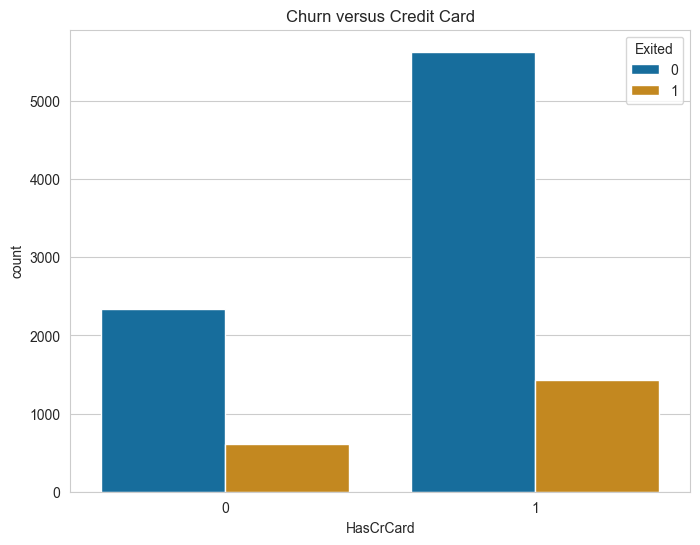

In [34]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x= 'HasCrCard', hue = 'Exited', palette = 'colorblind')
plt.title('Churn versus Credit Card')
plt.show() 

In [35]:
churn_rate_card = df.groupby('HasCrCard')['Exited'].mean()*100
print(churn_rate_card)

HasCrCard
0    20.814941
1    20.198441
Name: Exited, dtype: float64


Ter um cartão de crédito não impacta significativamente a probabilidade de saída do cliente, pois a diferença é mínima.

### Churn por Status de Atividade do Membro
Quem são mais propensos a serem retidos? Clientes ativos ou não ativos?

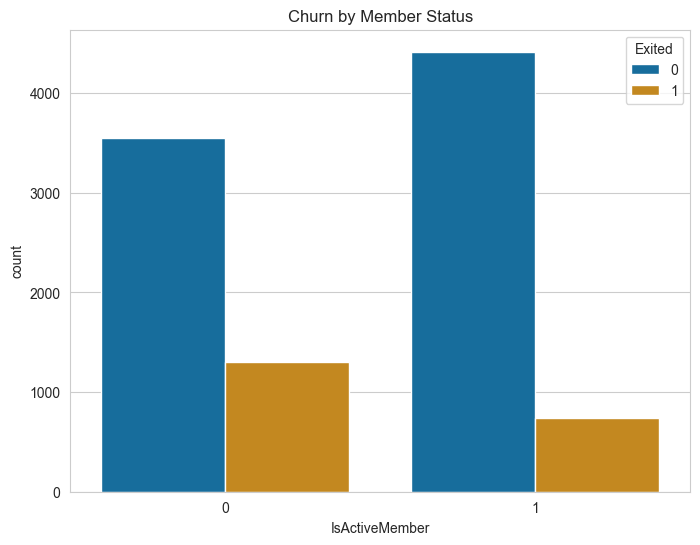

In [36]:
plt.figure(figsize = (8, 6))
sns.countplot(data = df, x= 'IsActiveMember', hue = 'Exited', palette = 'colorblind')
plt.title('Churn by Member Status')
plt.show() 

In [37]:
churn_rate_active_status = df.groupby('IsActiveMember')['Exited'].mean()*100
print(churn_rate_active_status)

IsActiveMember
0    26.871520
1    14.269074
Name: Exited, dtype: float64


Como esperado, usuários menos ativos estão saindo mais

### Churn por Tempo de Relacionamento (Tenure)
Clientes fiéis tendem a ficar ou sair?

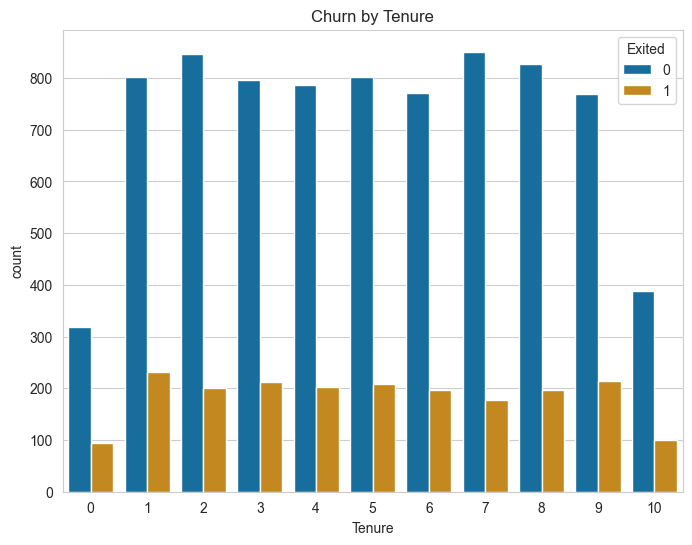

In [38]:
plt.figure(figsize = (8,6))
plt.title('Churn by Tenure')
sns.countplot(x = 'Tenure', hue = 'Exited', palette = 'colorblind', data = df)
plt.show()

In [39]:
churn_rate_tenure = df.groupby('Tenure')['Exited'].mean()*100
print(churn_rate_tenure)

Tenure
0     23.002421
1     22.415459
2     19.179389
3     21.110010
4     20.525784
5     20.652174
6     20.268873
7     17.217899
8     19.219512
9     21.747967
10    20.612245
Name: Exited, dtype: float64


A taxa média de churn é consistentemente em torno de 20% em diferentes tempos de relacionamento, o que é surpreendente e contrário às expectativas.

# Variáveis Contínuas
Vamos observar algumas de nossas variáveis contínuas e suas distribuições.

## Pontuação de Crédito
A pontuação de crédito tem uma correlação de -0,03 com nossa variável alvo. Vamos ver como ela está distribuída.

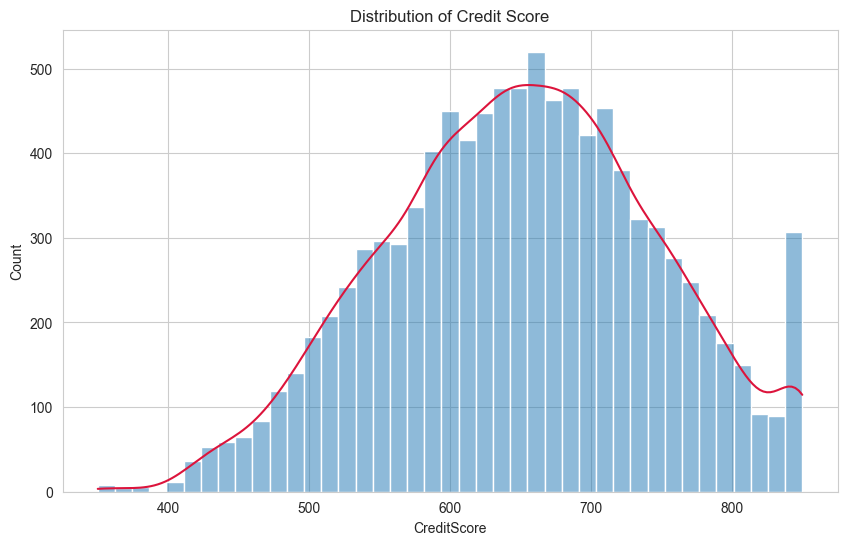

In [40]:
plt.figure(figsize=(10,6))
plt.title('Distribution of Credit Score')
ax = sns.histplot(data = df, x = 'CreditScore', palette= 'colorblind', kde = True)
ax.lines[0].set_color('crimson')
plt.show() 

In [23]:
from collections import Counter


media = df['CreditScore'].mean()
mediana = df['CreditScore'].median()


moda_data = Counter(df['CreditScore'])
moda = moda_data.most_common(1)[0][0]  

print(f"Média: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")

Média: 650.5288
Mediana: 652.0
Moda: 850


- Note que a variável apresenta uma distribuição quase Gaussiana.
- Essa configuração de **moda > mediana > média** indica que a distribuição é negativamente assimétrica (ou assimetrica à esquerda). Em outras palavras, embora muitos clientes tenham uma pontuação de crédito elevada, há uma quantidade significativa de clientes com pontuações mais baixas, o que resulta em uma média mais baixa. A distribuição possui uma cauda longa à esquerda (valores menores) que puxa a média para baixo, resultando em uma assimetria negativa.

## Saldo
Como a variável de saldo se comporta em termos de distribuição?

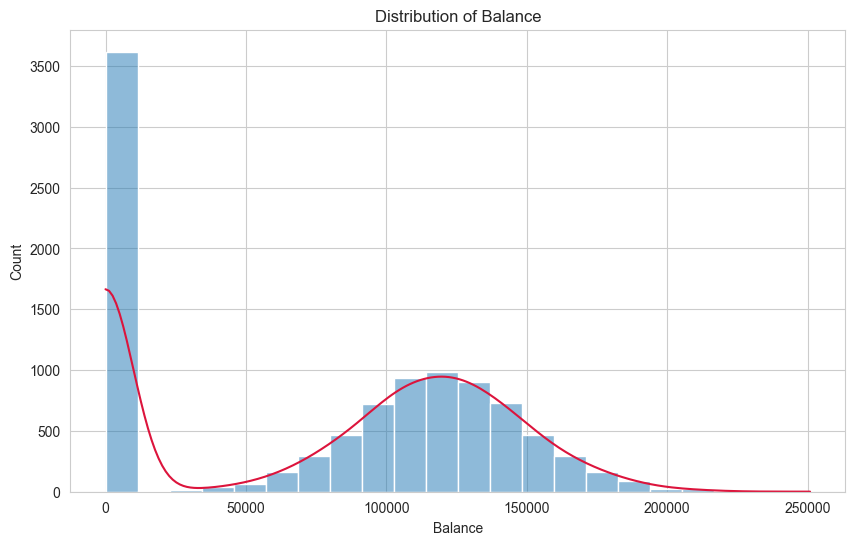

In [41]:
plt.figure(figsize=(10,6))
plt.title('Distribution of Balance')
ax = sns.histplot(data = df, x = 'Balance', palette= 'colorblind', kde = True)
ax.lines[0].set_color('crimson')
plt.show()

- Uma distribuição normal.
- Um pouco mais de 3500 clientes têm saldo zero em suas contas. Isso é um outlier significativo para um total de 10.000 clientes.
- Deveriamos levar essa analise para a área de negócio e talvez gerar uma nova base apenas com clientes de saldo não zerado para melhorar nosso modelo caso eles queiram evitar a saida apenas de clientes com saldo.

#### EstimatedSalary

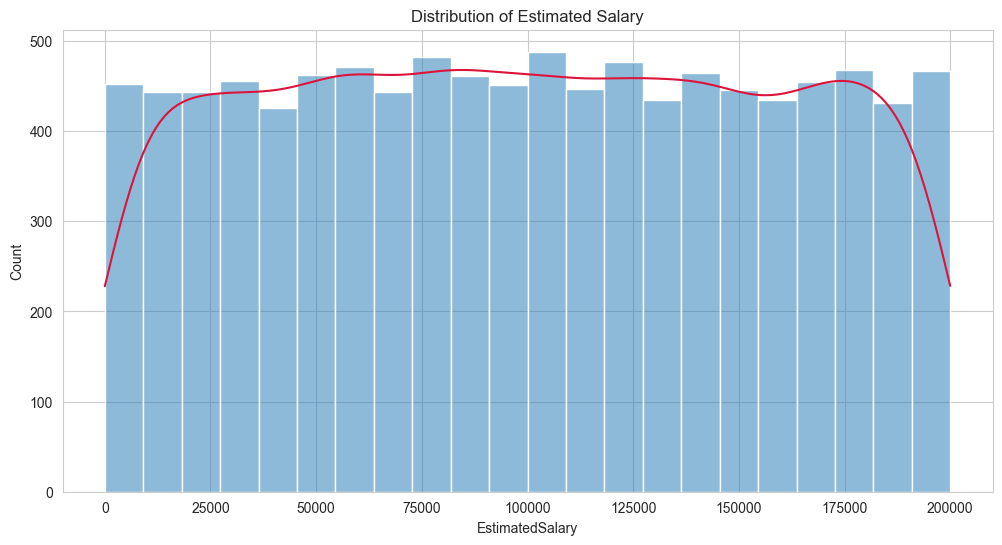

In [42]:
plt.figure(figsize=(12,6))
plt.title('Distribution of Estimated Salary')
ax = sns.histplot(data = df, x = 'EstimatedSalary', palette= 'colorblind', kde = True)
ax.lines[0].set_color('crimson')
plt.show()

- A variável segue uma distribuição uniforme (novamente, surpreendente e contrária às expectativas).

## Principais Insights

1. A matriz de correlação revela algumas relações interessantes:
    - **`Complain` e `Exited`**: A correlação de 1 entre "Complain" (reclamação) e "Exited" é um sinal forte de que clientes que apresentaram reclamações têm maior probabilidade de sair do banco. **CUIDADO**, é muito pouco usual uma corelação tão forte, se estivessemos falando de um problema real teriamos que rever os filtros usados pasa gerar essa base e verificar se não tem um problema com a origem da tabela. Inclusive, **como existe uma correlação de 100% entre si, nós vamos remover "Complain" do modelo.**

    - **`Age` e `Exited`**: Há uma correlação positiva moderada (0.29) entre a idade e a saída do banco, indicando que clientes mais velhos são mais propensos a deixar o banco. Isso pode ser um ponto importante para estratégias de retenção, focando em clientes de diferentes faixas etárias.

    - **`Balance` e `Exited`**: A correlação entre "Balance" e "Exited" é próxima de 0 (0.12), mas ainda sugere que clientes com saldos maiores têm uma leve tendência a deixar o banco. Isso é interessante, pois indica que mesmo clientes com saldo considerável podem estar em risco de churn. Outro insight seja que temos um numero grande de contas com saldo muito baixo de clientes que são inativos, caso nosso banco não cobre taxas de manutenção de conta podemos estar encergando um segundo problema aqui.

    - **`CreditScore` e `Exited`**: Há uma correlação moderadamente negativa (-0.03), embora baixa, entre a pontuação de crédito e a saída do banco. Isso sugere que clientes com pontuação de crédito mais alta são um pouco menos propensos a deixar o banco, mas o efeito é pequeno.

    - **`IsActiveMember` e `Exited`**: A correlação negativa (-0.16) entre "IsActiveMember" e "Exited" indica que clientes ativos são menos propensos a sair, confirmando a importância de manter os clientes engajados com os serviços do banco.

    - **`Satisfaction` e `Exited`**: Não há uma correlação significativa entre o "Satisfaction Score" (pontuação de satisfação) e a saída do banco, o que pode ser inesperado, indicando que a satisfação medida pelos métodos atuais pode não estar capturando a real intenção de churn dos clientes.

2. **Taxa de Churn**: Cerca de 20% dos clientes estão deixando o banco, de um total de 10.000.

3. **Churn vs. Variáveis**
    - **Gênero**: 25,07% das clientes do sexo feminino, em comparação com 16,47% dos clientes do sexo masculino, estão saindo.
    
    - **Geografia**: Entre os países, a Alemanha tem a maior taxa de churn, com 32,44%, seguida pela Espanha (16,67%) e França (16,17%).
    
    - **Faixa Etária**: A maioria dos clientes que saem está na faixa etária de 50 a 60 anos, com uma taxa de churn de 56,21%, seguida pela faixa de 40 a 50 anos, com uma taxa correspondente de 33,96%.
    
    - **Tempo de Relacionamento**: Mesmo os clientes fiéis com dez anos de relacionamento têm uma taxa de churn de 20%. Clientes com menos de um ano têm uma taxa de churn de 23%.
    
    - **Membro Ativo**: Membros não ativos têm uma taxa de churn mais alta, de 27%, enquanto os clientes ativos do banco têm uma taxa de churn de 14%.
    
    - **Número de Produtos**: Curiosamente, clientes com um número maior de produtos são mais propensos a churn. Clientes que adquiriram 3 produtos têm uma taxa de churn de 83%, enquanto aqueles que compraram apenas um produto têm uma taxa de churn de 28%.
    
4. Para as variáveis contínuas `CreditScore`, `Balance` e `EstimatedSalary`, foi observado o seguinte:
    - A pontuação média de crédito é de cerca de 650. A variável apresenta uma distribuição quase Gaussiana.
    
    - Uma distribuição normal também é observada para a variável de saldo. No entanto, um pouco mais de 3.500 clientes têm saldo zero em suas contas. Isso é um outlier significativo para um total de 10.000 clientes.
    
    - O `EstimatedSalary` segue uma distribuição uniforme.


# Pré-processamento de Dados

Essa fase de qualquer problema de ciência de dados envolve explorar mais profundamente as colunas para procurar lacunas e inconsistências nos dados. Perguntas a serem feitas:

- Como as colunas estão distribuídas? As distribuições são compatíveis com o modelo?
- Quais colunas são categóricas? Se sim, precisam ser convertidas em variáveis dummy?
- Quais colunas numéricas precisam de escalonamento de características? Qual tipo de escalonador deve ser usado para o problema dado?
- Existem colunas que precisam ser removidas para que o modelo aprenda melhor?

In [43]:
df.dtypes

RowNumber                int64
CustomerId               int64
Surname                 object
CreditScore              int64
Geography               object
Gender                  object
Age                      int64
Tenure                   int64
Balance                float64
NumOfProducts            int64
HasCrCard                int64
IsActiveMember           int64
EstimatedSalary        float64
Exited                   int64
Complain                 int64
Satisfaction Score       int64
Card Type               object
Point Earned             int64
AgeGroup              category
dtype: object

- Remova a faixa etária, pois foi utilizada apenas para fins de visualização de dados.
- Crie variáveis dummy para gênero, geografia e tipo de cartão.

In [44]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,AgeGroup
797,798,15766908,Trevisani,488,Germany,Male,32,3,114540.38,1,1,0,92568.07,0,0,2,GOLD,804,30-40
3292,3293,15757632,Hughes-Jones,496,France,Female,41,1,176024.05,2,1,0,182337.98,0,0,1,DIAMOND,754,40-50
4730,4731,15576550,Ugochukwu,619,Spain,Female,38,1,0.00,1,1,0,112442.63,1,1,4,PLATINUM,989,30-40
2660,2661,15756241,Yirawala,767,France,Female,44,2,152509.25,1,1,1,136915.15,0,0,4,GOLD,777,40-50
8775,8776,15812720,Hooker,807,Germany,Male,37,10,130110.45,2,0,1,172097.95,0,0,4,DIAMOND,539,30-40


In [24]:
df1 = pd.get_dummies(df, columns= ['Geography','Gender', 'Card Type'],
                         dtype = int) 

In [25]:
df1.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,AgeGroup,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
2077,2078,15744843,K'ung,569,34,6,144855.34,1,0,0,...,"(33, 34]",0,0,1,1,0,0,1,0,0
6249,6250,15806486,Cunningham,705,48,0,0.00,2,0,0,...,"(47, 48]",1,0,0,1,0,0,0,0,1
2172,2173,15651585,Power,661,35,2,117212.18,1,1,1,...,"(34, 35]",0,1,0,0,1,1,0,0,0
841,842,15737792,Abbie,818,31,1,186796.37,1,0,0,...,"(30, 31]",1,0,0,1,0,0,0,1,0
1419,1420,15705657,Hewitt,535,44,2,114427.86,1,1,1,...,"(43, 44]",1,0,0,1,0,0,0,1,0


In [26]:
df.shape

(10000, 19)

In [27]:
df1.shape

(10000, 25)

In [28]:
df2 = df1.drop(['RowNumber','CustomerId','Surname','Complain','AgeGroup'], axis = 1)

In [29]:
df2.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Satisfaction Score,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
5537,527,41,10,136733.24,1,1,1,57589.29,0,4,661,0,1,0,1,0,1,0,0,0
7696,614,39,8,125997.22,1,1,1,128049.34,1,5,817,0,1,0,1,0,1,0,0,0
5235,645,68,9,0.00,4,1,1,176353.87,1,4,430,1,0,0,1,0,0,1,0,0
9561,678,36,6,118448.15,2,1,0,53172.02,0,3,761,0,1,0,0,1,0,1,0,0
4003,750,26,1,151510.17,2,1,1,19921.72,0,5,433,1,0,0,1,0,0,0,1,0


In [30]:
df2.shape

(10000, 20)

## Divisão Treino-Teste
Vamos dividir os dados na proporção de 80-20, onde 80% dos dados serão usados para treinar o modelo. Primeiro, vamos criar X e y. importante separarmos os dados antes de qualquer normalização, assim evitamos vazamento de dados de treino para nossos dados de teste.

In [31]:
X = df2.drop('Exited', axis=1)
y = df2['Exited']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Escalonamento de Características
Esta é uma técnica de pré-processamento usada para padronizar as características independentes em uma faixa fixa. Isso é feito para lidar com magnitudes/valores/unidades que variam bastante nos dados.

Um algoritmo de aprendizado de máquina sem o escalonamento de características tende a atribuir maior peso a valores maiores e menor peso a valores menores, independentemente da unidade dos valores. Isso afeta o aprendizado do modelo.

In [34]:
from sklearn.preprocessing import MinMaxScaler

> **O `MinMaxScaler` escala as características numéricas em uma faixa de (0,1)**

In [35]:
scaler = MinMaxScaler()

In [36]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

## Modelo - Regressão Logística

A Regressão Logística é um problema de regressão linear onde a **variável alvo/dependente possui um resultado binário**. Essa variável alvo é ajustada em relação a um conjunto de características independentes, de forma semelhante à regressão linear.

Aqui, a variável dependente/alvo é `Exited`, que tem um resultado de 0 (o cliente não saiu) ou 1 (o cliente saiu).

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logreg_model = LogisticRegression()

In [39]:
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [40]:
predictions = logreg_model.predict(X_test)
predictions 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Avaliação de modelo

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [42]:
print('Accuracy Score:')

accuracy_score(y_test, predictions)

Accuracy Score:


0.812

In [43]:
print("Classification Report")

print('\n')

print(classification_report(y_test, predictions))

Classification Report


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.56      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [44]:
print('Confusion Matrix')

print('\n')

print(confusion_matrix(y_test, predictions))

Confusion Matrix


[[1547   60]
 [ 316   77]]


## Tudo sobre as Métricas - Acurácia, Precisão, Sensibilidade, F1

### Acurácia

A acurácia responde à pergunta: **'De todas as previsões feitas, quantas foram realmente verdadeiras?'**

![image.png](attachment:22982ac6-2278-4054-9392-2de10a9fe7e0.png)

[Fonte da Imagem](https://cdn.prod.website-files.com/5fed49be52334588b156311c/6369312b86fe50cbb5aff369_s5DUTobZ_IV81v5DRuVDP8x4TGzIgu6HBRnU2uFw6GAJeotedHvzL6COHit7yz7Uuvs8wieZIe2gCJNy4RkZQHZSzZqehgr8MngwkhbcI0p0loYlC35lKgzonTlvroC5t0Swwp820neVOEgsDWwlzfuWWLCmp_tSQIU5xVVKC6bd2lKV67_AbMDTVOnw5w.png)

In [45]:
print('Accuracy:')

(1547+77)/(1547+77+316+60)

Accuracy of Model :


0.812

### Precisão

A precisão responde à pergunta: **"De todas as previsões POSITIVAS feitas, quantas foram verdadeiras?"**

![image.png](attachment:6f022f0f-d651-41c6-b00a-154a1289e6d7.png)

[Fonte da Imagem](https://cdn.prod.website-files.com/5fed49be52334588b156311c/6369312b93b4e700f7ed539f_F0UROoldDgIawO9KVBShiUK2lDPt1v5wTm5YMr-oOE83oOBbMMkWYOEeZnnWGI-0ZwwcNx1BvMGKSv-GbF4pggh2q8Z6P1fQgboW2zL6ktqOaJetXbGSUQFx6P1Ah-Zz8XPB596qGuhXzLdJyhv0altnSKkqlw1veOuvvPjLU8NcGNVlpTTl-PYhyZLN5Q.png)

In [72]:
print('Precision:')

1547/(1547+316)

Precision of Model:


0.8303811057434246

### Sensibilidade (Recall)

A revocação responde à pergunta - **"De todos os pontos de dados que deveriam ser previstos como verdadeiros, quantos nós realmente previmos corretamente como verdadeiros?"**

![image.png](attachment:0d55d705-a55b-4cb2-815b-2575b568f698.png)

[Fonte da Imagem](https://cdn.prod.website-files.com/5fed49be52334588b156311c/6369312bddc623f50aa43b52_Ttp9NjMsqUUS0vllpfAWCC6lLMbluniEMHDBspNXPNKi7iDThZzJ-xMgHL5vDWnKdElq50g0wvBxIco9oaY8_sBbqxpr0H_4twHr2fyOjB6sm2g9B2V9cojcc44dcRLVyUKmfH4VsbfVGSWwcrce40ONkrRm0FBJ8ZKo6AiNH2KSWsDD8hJSmBXMSk7Fpg.png)

In [71]:
print('Recall Score:')

1547/(1547+60)


Recall Score of the Model:


0.9626633478531424

### F1 Score

O F1 Score é uma medida que combina sensibilidade e precisão. Como vimos, há um equilíbrio entre precisão e revocação, portanto, o F1 pode ser usado para medir quão eficazmente nossos modelos fazem esse equilíbrio.

Uma característica importante do F1 Score é que o resultado será zero se qualquer um dos componentes (precisão ou revocação) for zero. Assim, ele penaliza fortemente valores extremamente negativos de qualquer um dos componentes.

![image.png](attachment:84b41db2-f24e-4432-9292-378e3bbe2d78.png)

[Fonte da Imagem](https://cdn.prod.website-files.com/5fed49be52334588b156311c/6369312b1a6a71e630ff6647_AxQGlrOBWDDXnJ1vy1RJw84ZxP9kwM6V20lnT4YOie8uFDFWJYKdCVULk-LBENS4QVQxAgrXhXaPCI3UnNza5gBXoHk0-W2lWCxfzeRr4MEunBo5gtLh5yOtZEMuUQkHwikAjm6YGBTUyOxjmro13KUPHhbjiei37LzZnytsZhbRSwiF4236Bx9JBjArIQ.png)

In [73]:
precision = 83
recall = 96

f1_score = 2*(precision*recall)/(precision+recall)

In [74]:
print('F1 Score:')

print(f1_score)

F1 Score of the Model:
89.02793296089385


## Considerações Finais

Como a análise exploratória sugeriu, o grupo demográfico alvo para minimizar o churn são mulheres na faixa etária de 50+ anos, principalmente na Alemanha.

O modelo de regressão logística tem uma acurácia geral de 81%, o que é uma pontuação razoável para esse conjunto de dados com 10.000 registros.

## Escopo Futuro

A coluna `Balance` apresentou cerca de 3500 pontos de dados com saldo zero — esses clientes têm saldo zero em suas contas. Esse outlier poderia ser investigado mais a fundo com as seguintes perguntas:

1. O banco oferece contas com saldo zero? Se sim, está disponível para todos os países no conjunto de dados?

2. Caso contrário, como imputar os valores para essa coluna?

3. No caso atual, a coluna foi escalada na faixa (0,1) com o MinMaxScaler. Outro tipo de escalonamento poderia gerar um resultado diferente?

## Referências

1. [Scikit Learn Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
2. [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
3. [Precision, Recall, F1 Scores](https://www.labelf.ai/blog/what-is-accuracy-precision-recall-and-f1-score) 
4. [Normal Distribution](https://www.mathsisfun.com/data/standard-normal-distribution.html)
5. [Uniform Distribution](https://www.mathsisfun.com/data/random-variables-continuous.html)